<a href="https://colab.research.google.com/github/Claye1/Claye1/blob/main/EV_Market_Size_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**EV MARKET SIZE ANALYSIS** 🚗
**Load Data; importing the necessary Python libraries and Dataset**

In [40]:
import pandas as pd
ev_data = pd.read_csv("/content/drive/MyDrive/EV Market Size Project/Electric_Vehicle_Population_Data.csv")
print(ev_data.head())

   VIN (1-10)     County       City State  Postal Code  Model Year   Make  \
0  5YJYGDEE1L       King    Seattle    WA      98122.0        2020  TESLA   
1  7SAYGDEE9P  Snohomish    Bothell    WA      98021.0        2023  TESLA   
2  5YJSA1E4XK       King    Seattle    WA      98109.0        2019  TESLA   
3  5YJSA1E27G       King   Issaquah    WA      98027.0        2016  TESLA   
4  5YJYGDEE5M     Kitsap  Suquamish    WA      98392.0        2021  TESLA   

     Model           Electric Vehicle Type  \
0  MODEL Y  Battery Electric Vehicle (BEV)   
1  MODEL Y  Battery Electric Vehicle (BEV)   
2  MODEL S  Battery Electric Vehicle (BEV)   
3  MODEL S  Battery Electric Vehicle (BEV)   
4  MODEL Y  Battery Electric Vehicle (BEV)   

   Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0            Clean Alternative Fuel Vehicle Eligible             291   
1  Eligibility unknown as battery range has not b...               0   
2            Clean Alternative Fuel Vehicle 



#**CLEANING THE DATA SET / DATA PRE-PROCESSING**#

**CLEAR INDICATION THAT THE DATASET IS BASED ON THE EV POPULATION OF IN UNITED STATES**

In [41]:
ev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

**IDENTIFYING MISSING DATA IN THE DATASET**

In [42]:
ev_data.isnull().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64


**REMOVING MISSING VALUES**

**EV Adoption Over Time:** Analyze the growth of the EV population by model year.

***

In [43]:
ev_data = ev_data.dropna()

<ipython-input-44-3c467cd33a58>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ev_adoption_by_year.index, y =ev_adoption_by_year.values, palette="viridis")


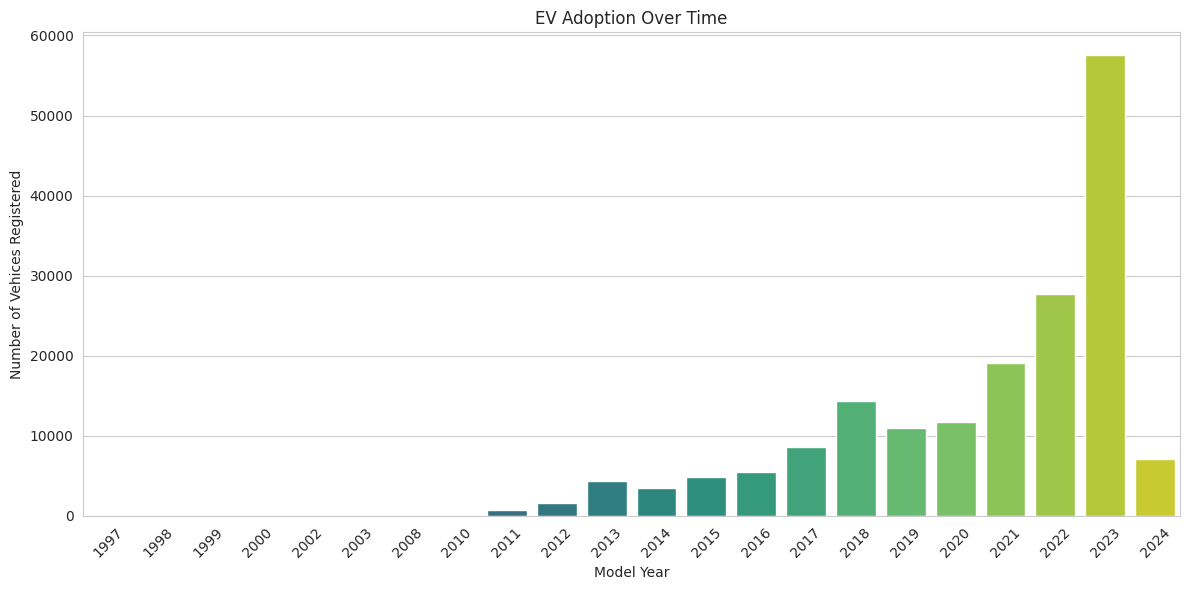

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

#EV ADOPTION OVER TIME
plt.figure(figsize=(12, 6))
ev_adoption_by_year = ev_data['Model Year'].value_counts().sort_index()
sns.barplot(x=ev_adoption_by_year.index, y =ev_adoption_by_year.values, palette="viridis")
plt.title('EV Adoption Over Time')
plt.xlabel('Model Year')
plt.ylabel('Number of Vehices Registered')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

From the above bar chart, it is clear EV Adoption has increased over time. The number of vehicles registered in 2023 was twice the number in 2022. This indicates a peak in the adoption of EV.


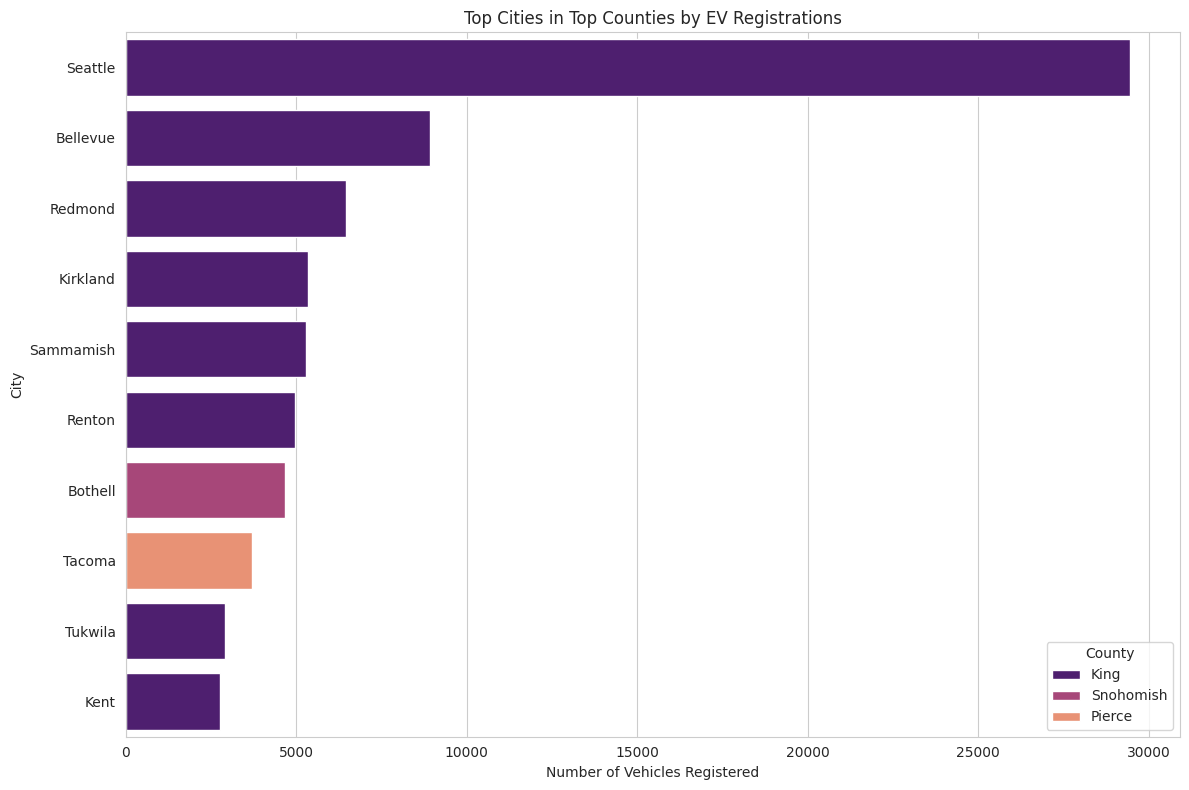

In [45]:
#GEOGRAPHIC DISTRIBUTION AT COUNTY LEVEL
ev_county_distribution = ev_data['County'].value_counts()
top_counties = ev_county_distribution.head(3).index

#FILTERING THE DATASET FOR THESE TOP COUNTIES
top_counties_data = ev_data[ev_data['County'].isin(top_counties)]

#ANALYSING THE DISTRIBUTION OF EVs WITHIN THE CITIES OF THESE TOP COUNTIES
ev_city_distribution_top_countries = top_counties_data.groupby(['County','City']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')

#VISUALIZE THE TOP 10 CITIES ACROSS THESE COUNTIES
top_cities = ev_city_distribution_top_countries.head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x='Number of Vehicles', y='City', hue='County', data=top_cities, palette="magma")
plt.title('Top Cities in Top Counties by EV Registrations')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('City')
plt.legend(title='County')
plt.tight_layout()
plt.show()

The above graph compares the number of EVs registered in various cities with 3 counties, namely; King, Snohomish and Pierce. The horizontal bars represent cities and their length corresponds to the number of vehicles registered, colour-coded by county. Interpretation: Seattle has the highest number of EV registrations by a huge margin. King County dominates the registration of EVs and indicating that the County has more EV adoption.

**EXPLORING THE TYPES OF ELECTRIC VEHICLES REPRESENTED IN THE DATASET**

Understanding the breakdown between different EV types; Battery EV (BEV), Plug-in Hybrid EVs (PHEV), providing consumer preferences and adoption pattern.

<ipython-input-46-03154f78d8da>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ev_type_distribution.values, y=ev_type_distribution.index, palette="rocket")


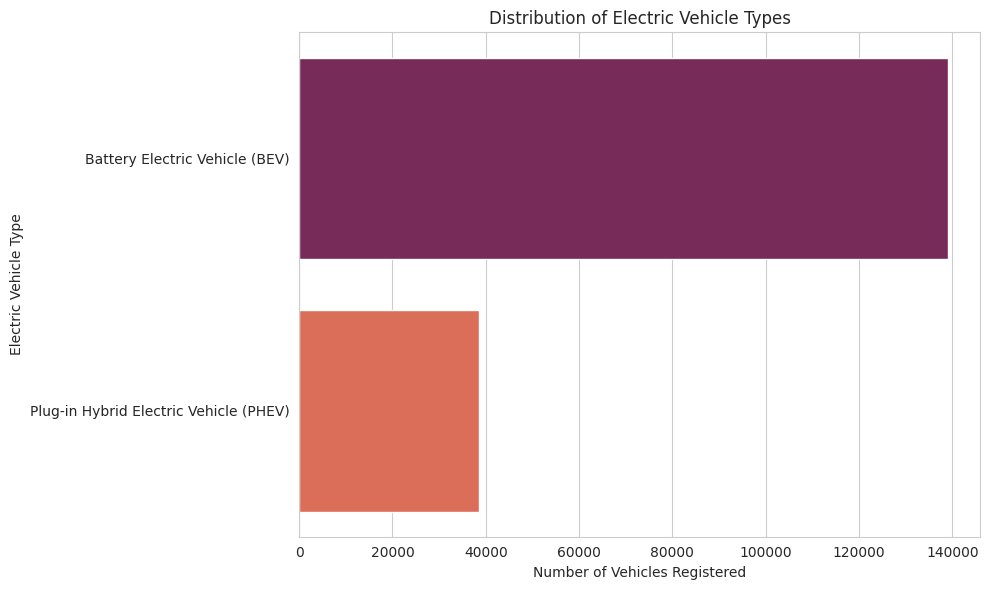

In [46]:
#ANALYZING THE DISTRIBUTION OF ELECTRIC VEHICLE TYPES
ev_type_distribution = ev_data['Electric Vehicle Type'].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=ev_type_distribution.values, y=ev_type_distribution.index, palette="rocket")
plt.title('Distribution of Electric Vehicle Types')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Electric Vehicle Type')
plt.tight_layout()
plt.show()

BEVs are more popular or preferred over PHEVs from the above graph.

<ipython-input-47-2aecf2cf9f4f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ev_make_distribution.values, y=ev_make_distribution.index, palette="cubehelix")


<Axes: ylabel='Make'>

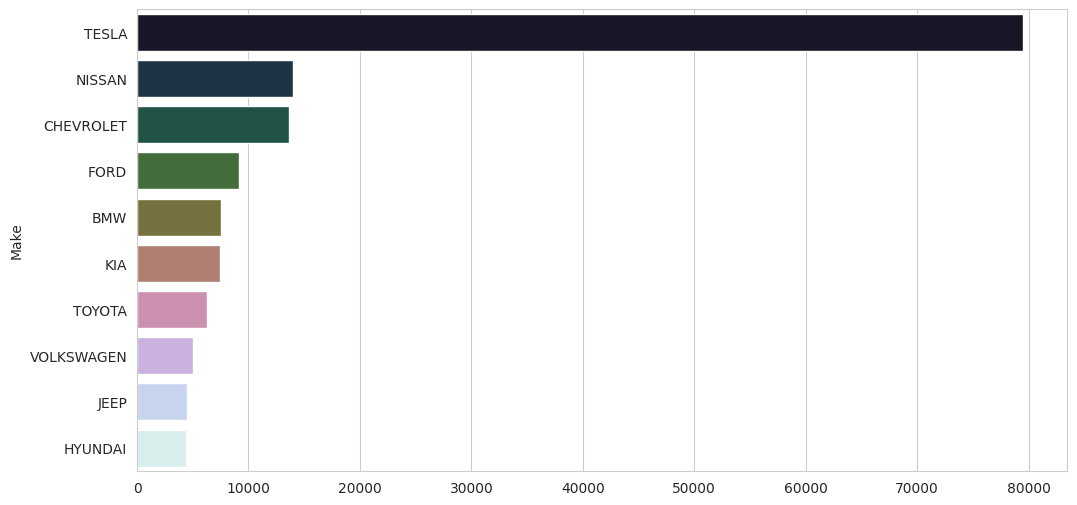

In [47]:
#ANALYSING THE POPULARITY OF EV MANUFACTURERS
ev_make_distribution = ev_data['Make'].value_counts().head(10) #LIMITING TO TOP 10 CLARITY

plt.figure(figsize=(12,6))
sns.barplot(x=ev_make_distribution.values, y=ev_make_distribution.index, palette="cubehelix")

Indicatively form the graph above, Tesla is the leader when it comes to EV adoption and registration.

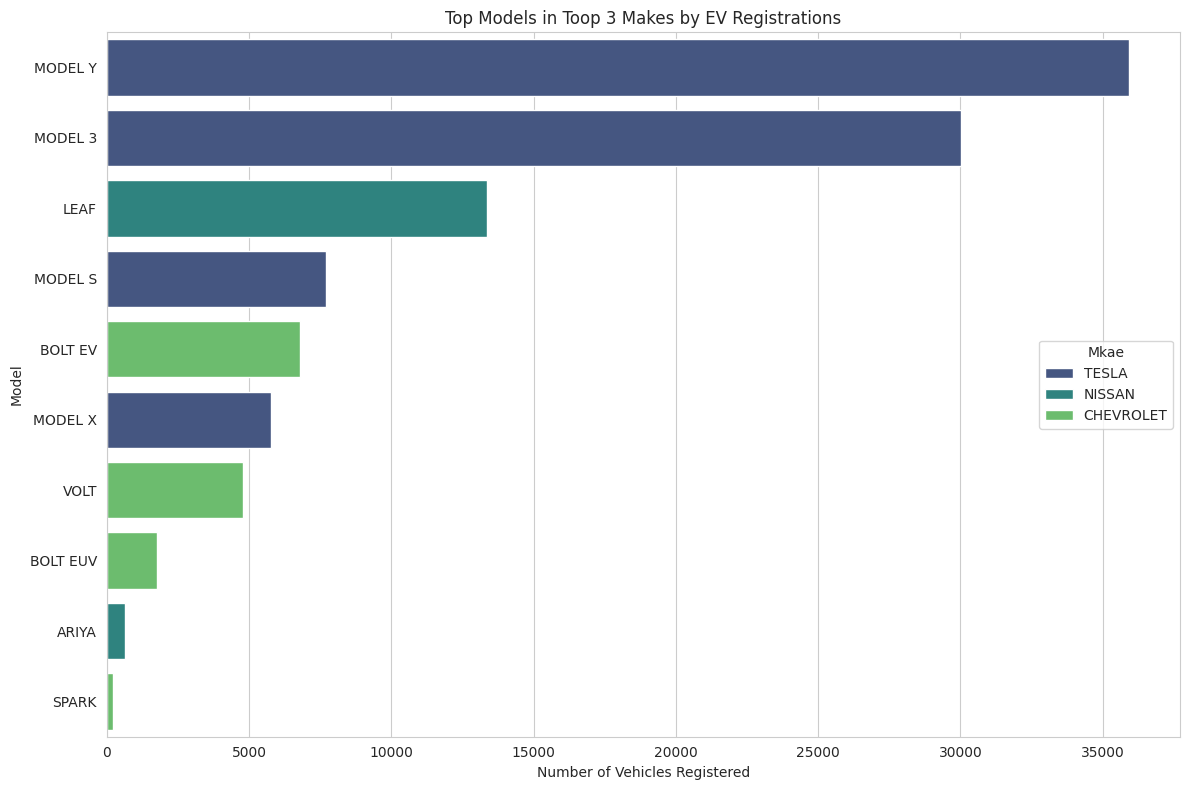

In [48]:
#SELECTING THE TOP 3 MANUFACTURERS BASED ON THE NUMBER OF VEHICLES REGISTERED
top_3_make = ev_make_distribution.head(3).index

# Assuming ev_data is your DataFrame with EV data
top_3_makes = ev_data['Make'].value_counts().head(3).index

#FILTERING THE DATASET FOR THESE TOP MANUFACTURERS
top_makes_data = ev_data[ev_data['Make'].isin(top_3_makes)]

#ANALYZING THE POPULARITY OF EV MODELS WITH THESE TOP MANUFACTURERS
ev_model_distribution_top_makes = top_makes_data.groupby(['Make','Model']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')

#VISUALIZING THE TOP 10 MODELS ACROSS THESE MANUFACTURERS FOR CLARITY
top_models = ev_model_distribution_top_makes.head(10)

plt.figure(figsize=(12,8))
sns.barplot(x='Number of Vehicles', y='Model', hue='Make', data=top_models, palette="viridis")
plt.title('Top Models in Toop 3 Makes by EV Registrations')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Model')
plt.legend(title='Mkae', loc='center right')
plt.tight_layout()
plt.show()


##EXPLORING RANGE OF EVs##

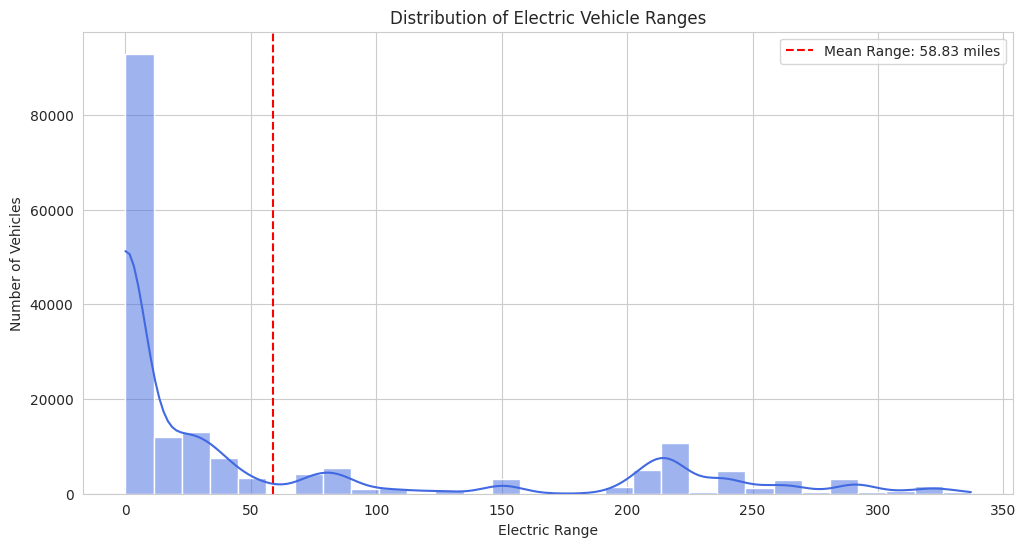

In [49]:
#ANALYZING THE DISTRIBUTION OF ELECTRIC RANGE OF VEHICLES
plt.figure(figsize=(12, 6))
sns.histplot(ev_data['Electric Range'], bins=30, kde=True, color='royalblue')
plt.title('Distribution of Electric Vehicle Ranges')
plt.ylabel('Number of Vehicles')
plt.axvline(ev_data['Electric Range'].mean(), color='red', linestyle='--', label=f"Mean Range: {ev_data['Electric Range'].mean():.2f} miles")
plt.legend()
plt.show()

The histogram illustrates the distribution of electric vehicle ranges, emphasizing the mean electric range. Notably, a considerable number of vehicles possess a lower electric range, as indicated by the peak just below 50 miles. The distribution exhibits right-skewness, characterized by a long tail extending towards higher ranges; however, vehicles within this range occur less frequently. The mean electric range is determined to be approximately 58.84 miles, which is comparatively lower than the highest ranges depicted. Although some vehicles boast ranges reaching up to 350 miles, the majority of vehicles display ranges falling below the calculated mean. This distribution indicates that despite the availability of EVs with higher ranges, the average range is skewed downwards due to the significant presence of vehicles with shorter ranges.

#TREND OF EV RANGES OVER MODEL YEARS#

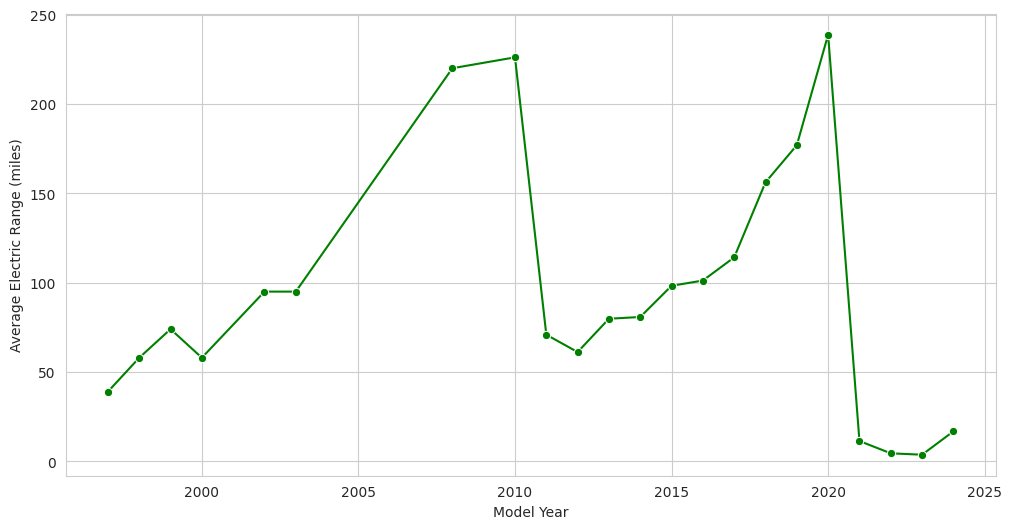

In [51]:
#CALCULATING THE AVERAGE  RANGE BY MODEL YEAR
average_range_by_year = ev_data.groupby('Model Year')['Electric Range'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Model Year', y='Electric Range', data=average_range_by_year, marker='o', color='green')
plt.xlabel('Model Year')
plt.ylabel('Average Electric Range (miles)')
plt.grid(True)
plt.show()

The line graph depicts the evolution of the average electric range of vehicles from 2000 to 2024. It highlights an overall upward trend, indicating advancements in technology and battery efficiency. A notable peak is observed around 2020 with the highest average range, followed by a substantial drop. This decline could result from incomplete data or the introduction of lower-range models. Subsequently, a slight recovery in average range is seen in the most recent year. Despite fluctuations, the general trend over the past two decades indicates a continuous improvement in the electric range of EVs.

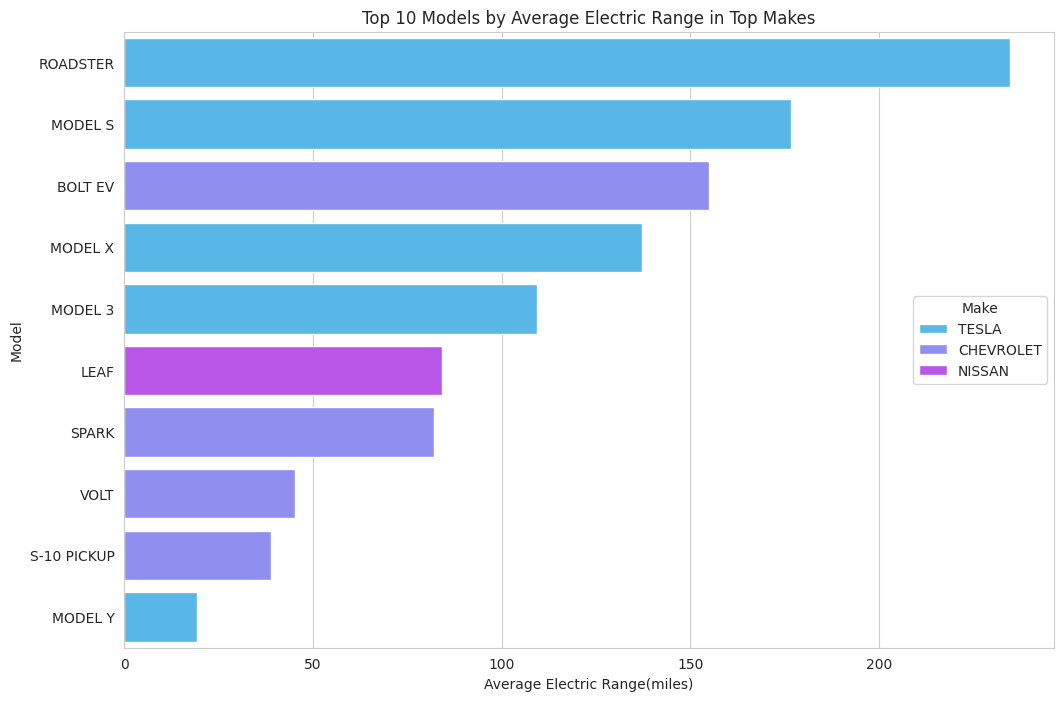

In [53]:
#EXPLORING RANGE OF EVs AMONG TOP MANUFACTURERS#
average_range_by_model = top_makes_data.groupby(['Make','Model']) ['Electric Range'].mean().sort_values(ascending=False).reset_index()

#The TOP 10 MODELS WITH THE HIGHEST AVERAGE ELECTRIC RANGE
top_range_models = average_range_by_model.head(10)

plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='Electric Range',y='Model', hue='Make', data=top_range_models, palette="cool")
plt.title('Top 10 Models by Average Electric Range in Top Makes')
plt.xlabel('Average Electric Range(miles)')
plt.ylabel('Model')
plt.legend(title='Make', loc='center right')
plt.show()

#Estimated Market Size Analysis of Electric Vehicles in the United States#

In [54]:
#CALCULATE THE NUMBER OF EVs REGISTERED EACH YEAR
ev_registration_counts = ev_data['Model Year'].value_counts().sort_index()
ev_registration_counts

Model Year
1997        1
1998        1
1999        5
2000        7
2002        2
2003        1
2008       19
2010       23
2011      775
2012     1614
2013     4399
2014     3496
2015     4826
2016     5469
2017     8534
2018    14286
2019    10913
2020    11740
2021    19063
2022    27708
2023    57519
2024     7072
Name: count, dtype: int64

#FORECASTING THE TOTAL NUMBER OF EVs EXPECTED TO BE REGISTERED IN 2024#

In [55]:
from scipy.optimize import curve_fit
import numpy as np

#FILTER THE DATASET TO INCLUDE YEARS WITH COMPLETE DATA, ASSUMING 2023 IS THE LAST COMPLETE YEAR
filtered_years = ev_registration_counts[ev_registration_counts.index <= 2023]

#DEFINE A FUNCTION FOR EXPONENTIAL GROWTH TO FIT THE DATA
def exp_growth(x, a, b):
  return a * np.exp(b * x)

#PREPARE THE DATA FOR CURVE FITTING
x_data = filtered_years.index - filtered_years.index.min()
y_data = filtered_years.values

#FIT THE DATA TO THE EXPONENTIAL GROWTH FUNCTION
params, covariance = curve_fit(exp_growth, x_data, y_data)

#USE THE FITTED FUNCTION TO FORECAST THE NUMBER OF EVs FOR 2024 AND THE NEXT FIVE YEARS
forecast_years = np.arange(2024, 2024 + 6) - filtered_years.index.min()
forecasted_values = exp_growth(forecast_years, *params)

#CREATE A DICTIONARY TO DISPLAY THE FORECASTED VALUES FOR EASIER INTERPRETATION
forecasted_evs = dict(zip(forecast_years + filtered_years.index.min(),forecasted_values))

print(forecasted_evs)

{2024: 79079.2066611501, 2025: 119653.95934090775, 2026: 181047.21317328632, 2027: 273940.7335817853, 2028: 414496.9933533305, 2029: 627171.2689549965}


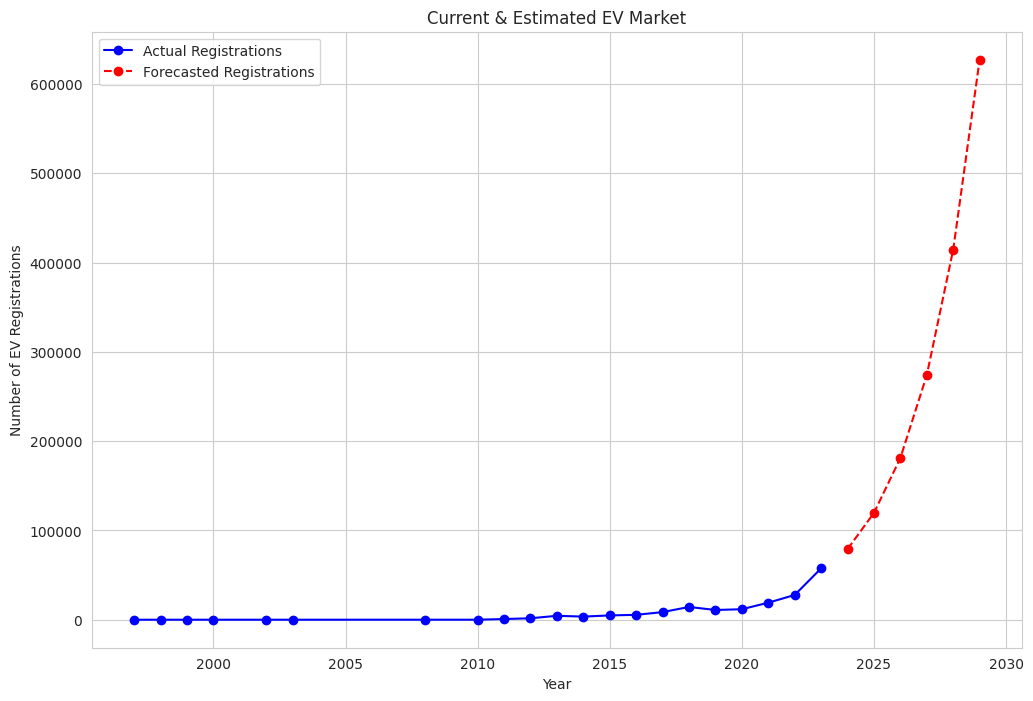

In [57]:
#PLOTTING THE ESTIMATED MARKET SIZE
#PREPARE DATA FOR PLOTTING
years = np.arange(filtered_years.index.min(), 2029 + 1)
actual_years = filtered_years.index
forecast_years_full = np.arange(2024, 2029 + 1)

#ACTUAL AND FORECASTED VALUES
actual_values = filtered_years.values
forecasted_values_full = [forecasted_evs[year] for year in forecast_years_full]

plt.figure(figsize=(12, 8))
plt.plot(actual_years, actual_values, 'bo-', label='Actual Registrations')
plt.plot(forecast_years_full, forecasted_values_full, 'ro--', label='Forecasted Registrations')

plt.title('Current & Estimated EV Market')
plt.xlabel('Year')
plt.ylabel('Number of EV Registrations')
plt.legend()
plt.grid(True)

plt.show()


The graph depicts a notable increase in EV adoption post-2010, indicated by a steep upward trend in actual registrations. Forecasted registrations predict further dramatic growth, suggesting a considerable expansion in the EV market size. Rising consumer adoption and promising investment opportunities are expected as the EV industry continues to flourish.